# Data analysis, manipulation and plotting


## Introduction

The tutorial contains:

1. Introduction to arrays and vectors in numpy.  

2. Loading/Saving data. 

3. Essential methods for data analysis/manipulation. 

4. Elementary plotting using matplotlib.


In [1]:
#Import necessary libraries 
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import os


### Creating data in numpy

#### Numpy arrays
Numpy has several convenient functions for creation of arrays. The following are especially useful for this course (read more about array creation [here](https://docs.scipy.org/doc/numpy-1.15.0/user/basics.creation.html)).

* `np.ones(size)`, `np.zeros(size)`: Create an array of size `size` with either all ones or zeros.
* `np.linspace(start, stop, num)`, `np.arange(start, stop, step)`: Create 1d arrays of ranges from `start` to `stop` (inclusive) using either interpolation to create `num` elements in the case of `linspace` or using a certain `step`-size in `arange`.
* `np.random.uniform(size)`, `np.random.normal(loc, scale, size)`: Create arrays with random elements drawn either from a uniform or normal/Gaussian distribution. For the gaussian, `loc`=$\mu$ (mean) and `scale`=$\sigma$ (standard deviation).

Don't worry to much about remembering all of them for now. Examples are including in the next cell for easy experimentation:


In [2]:
a_ones = np.ones((2, 3)) # 2 by 3 array of ones. 
a_zeros = np.zeros((3, 2)) # 2 by 3 array of ones.
a_linspace = np.linspace(0, 10, 5) ## creates an array of 5 numbers evenly spaced from 0 to 9 (10-1 # zero indexed).
a_arange = np.arange(0, 10, 2) # creates arrays from 0 to 9 (max) with a stride of 2. since (10>9) the max value will be 8.
a_uniform = np.random.uniform(size= (2, 2)) # creates a 2 by 2 array of "random" numbers drawn from a uniform distribution. 
a_normal = np.random.normal(size=(2, 2))  # creates a 2 by 2 array of "random" numbers drawn from a normal/gaussian distribution. 

print('ones:\n', a_ones)
print('zeros:\n', a_zeros)
print('linspace:\n', a_linspace)
print('arange:\n', a_arange)
print('uniform:\n', a_uniform)
print('normal:\n', a_normal)


ones:
 [[1. 1. 1.]
 [1. 1. 1.]]
zeros:
 [[0. 0.]
 [0. 0.]
 [0. 0.]]
linspace:
 [ 0.   2.5  5.   7.5 10. ]
arange:
 [0 2 4 6 8]
uniform:
 [[0.69085025 0.95274501]
 [0.49304304 0.09971508]]
normal:
 [[-0.39178075  0.35240942]
 [ 1.5176698   0.81263053]]


**Note:** There is no need for iteration (i.e. loops) when creating arrays in numpy!


## Saving arrays with numpy

The following example shows how data (examples from above) is saved with numpy. We can store data in two different formats.
* `np.save(save_path)`stores the data as a compressed npy file.
* `np.savetxt(save_path)` stores the data as a (uncompressed txt-file).


In [3]:
a_normal_50 = np.random.normal(size=(50,2))
np.save('./Data/RandomData.npy',a_normal_50) ## Saving the array as a compressed npy file (numpy data format)

a_arange_50 = np.arange(0,100,2)
np.save('./Data/StructuredData.npy',a_arange_50)

#numpy can additionally save to as a txt-file (uncompressed) formats like.
a_linspace_50 = np.linspace((1,2),(10,20),10)
np.savetxt('./Data/Txt_file.txt',a_linspace_50) ### saving data as a regular txt file, also possible to save as a csv file



## Loading data with numpy

### loading numpy data


The data can correspondingly be loaded with the numpy functions `np.load(path)` and `np.loadtxt(path)`.


In [4]:
A = np.load('./Data/RandomData.npy') ## Loading data stored as a compressed npy file (numpy data format)

B = np.load('./Data/StructuredData.npy')

#load data stored as a txt/ (csv) file (uncompressed) formats like.
C = np.loadtxt('./Data/Txt_file.txt')


The loaded `numpy` arrays are printed in the cell below.


In [5]:
# Note A[:N] is only a slice i.e. the first N elements of A
print('A:\n',A[:5])
print('B:\n',B[:10])
print('C:\n',C[:5])


A:
 [[-0.5428955  -1.11731609]
 [ 0.14002489 -0.48782315]
 [ 2.44798363 -0.8050595 ]
 [ 1.40884718 -0.21934172]
 [-0.23651036  1.177851  ]]
B:
 [ 0  2  4  6  8 10 12 14 16 18]
C:
 [[ 1.  2.]
 [ 2.  4.]
 [ 3.  6.]
 [ 4.  8.]
 [ 5. 10.]]


## Essential Numpy array method for data analysis and manipulation

The next section covers essential methods for data analysis and manipulation. The following methods will use abundently throughout the course and are worth paying careful attention to.

* `np.mean(Array,dim)`, `np.std(Array,dim)`: Calculated the mean value of a given numpy array of numbers (`floats` or `integers`). See documentation for a more detailed explanation <href=https://numpy.org/doc/stable/reference/generated/numpy.mean.html\>
* `np.shape(Array)`: Find the shape (dimensionality of a given data array), `Len(list/Array)` provides the length of the first list/Array dimension.
* `Slicing` using the `:` operator can call slices of an array A as `A[start:stop:step]`. `Broadcasting` can be used to perform elementwise numpy operations between different dimensional array.
* `Elementwise Addition and multiplication`, Adds of multiply array elemwise. This also works for more advanced operations e.g. exponentiating an Arrray.  
* `np.concatenation(Array list, axis)`: Stack numpy arrays along the direction of `axis`. 

`Numpy` can also be used to do linear algebra, but that will be covered in another tutorial. 


Next, we consider simple expamples to demonstra the functions above:


In [6]:
A = np.linspace(0,9,10)

B = np.array([
    [-16, 15, -14, 13],
    [-12, 11, -10, 9],
    [-8, 7, -6, 5],
    [-4, 3, -2, 1]
])

print('A:\n',A)
print('B:\n',B)


A:
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
B:
 [[-16  15 -14  13]
 [-12  11 -10   9]
 [ -8   7  -6   5]
 [ -4   3  -2   1]]


In [7]:
### Mean of an array 
# Using/calling the mean method from the numpy library to determine the mean of the loaded data.
print('Mean A:\n',np.mean(A)) 

# Most numpy array manipulation methods can additionally be called from an array object
print('Mean of using Array method:\n',A.mean())

# This equivalent way of calling the methods are possible for most numpy data manipulation methods. 
### Std of an array 
print('Std of A:\n',np.std(A))

### Sum of an array 
print('A sum:\n', np.sum(A))

### shape (size) of an array
print('A shape:\n',A.shape)
print('B shape:\n',B.shape)

## np.concatenation([A,B]) example
print('Concatenation of A and Slice of B matrix:\n',np.concatenate([A,B[0,:]],axis=0))


Mean A:
 4.5
Mean of using Array method:
 4.5
Std of A:
 2.8722813232690143
A sum:
 45.0
A shape:
 (10,)
B shape:
 (4, 4)
Concatenation of A and Slice of B matrix:
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9. -16.  15. -14.  13.]


## Slicing of arrays


In [8]:
### Slicing of array
print(B[:,0])

print(A[:5])
print('A[5:], A array except the first 5:\n',A[5:])

print('A[:-5], A array except the last 5:\n', A[:-5])

print('A[1::2] array of every second elemt of A starting from the second:\n',A[1::2])


[-16 -12  -8  -4]
[0. 1. 2. 3. 4.]
A[5:], A array except the first 5:
 [5. 6. 7. 8. 9.]
A[:-5], A array except the last 5:
 [0. 1. 2. 3. 4.]
A[1::2] array of every second elemt of A starting from the second:
 [1. 3. 5. 7. 9.]


## Array Arithmetic


In [9]:
### Adding of array
print('Adding a slice of A shape (4,) to B shape (4,4) using broadcasting:\n',A[:4]+B)

print('Adding constant to A (10,) using broadcasting:\n',A+10)
print('Adding single element array (shape (1,)) to B (shape (4,4)) using broadcasting:\n',B  + np.array([10]))

### Elementwise multiplication of arrayLoading
print('Elementwise multiplication of a slice of A (shape (4,)) to B (shape (4,4)) using broadcasting:\n',A[:4]*B)

### Add division example
print('Elementwise division of a slice of B (shape (4,)) and A (shape (4,)):\n',B[0,:]/A[1:5])


Adding a slice of A shape (4,) to B shape (4,4) using broadcasting:
 [[-16.  16. -12.  16.]
 [-12.  12.  -8.  12.]
 [ -8.   8.  -4.   8.]
 [ -4.   4.   0.   4.]]
Adding constant to A (10,) using broadcasting:
 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Adding single element array (shape (1,)) to B (shape (4,4)) using broadcasting:
 [[-6 25 -4 23]
 [-2 21  0 19]
 [ 2 17  4 15]
 [ 6 13  8 11]]
Elementwise multiplication of a slice of A (shape (4,)) to B (shape (4,4)) using broadcasting:
 [[ -0.  15. -28.  39.]
 [ -0.  11. -20.  27.]
 [ -0.   7. -12.  15.]
 [ -0.   3.  -4.   3.]]
Elementwise division of a slice of B (shape (4,)) and A (shape (4,)):
 [-16.           7.5         -4.66666667   3.25      ]


## Basics plotting with matplotlib
We start by importing the library:


In [10]:
# importing matplotlib.pyplot
import matplotlib.pyplot as plt


The `pyplot` module is a simple API for creating and manipulating plots using functions.

`plot` and `scatter` will be the most frequently used functions in this course.
* `plot` is typically used for creating connected line segments described by x and y data.
* `scatter` is used for plotting individual points, e.g. from a dataset. 

Take a look at the following sample plot code and output:


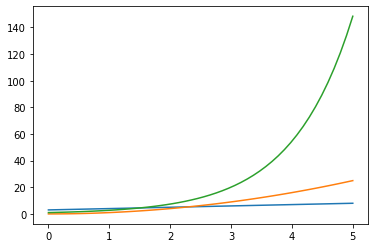

In [11]:
## comment on the functions being elemtwise operations on simple numpy arrays. 
x_range = np.linspace(0, 5, 50) # simple linspace array
y_linear = x_range + 3 # adding to constant to the numpy array (broadcasting)
y_quadratic = x_range**2 # elementwise exponetiation
y_exp = np.exp(x_range) # exponential function applied elemtwise to x_range

plt.plot(x_range, y_linear)
plt.plot(x_range, y_quadratic)
plt.plot(x_range,y_exp);


**Notes:**
* Typical use of `np.linspace`: to create x-axis values for graphical plots of functions.
* Notice how `y_quadratic` is created using elementwise exponentiation.
* Similarly, `y_exp` is generated using the numpy function `np.exp(x)` 
* Since Jupyter automatically outputs the last value returned in a cell, the `plt.plot` and similar functions return some text describing a figure object. This is simply the return value of the function and can be hidden by appending a `;` to the last call in a cell.


**Scatter plot**

Scatter plots work similarly but only plot the points without connections. In the example below, we create a quadratic function from the previously defined `x_range` and then add normally distributed random noise to it, and plot both the original (with `plt.plot`) and noisy points (with `plt.scatter`) to compare.


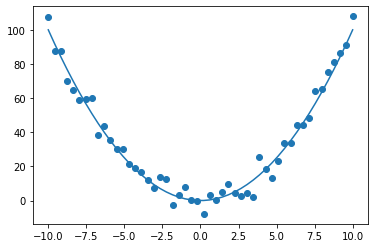

In [12]:
### Add comments to code, so the get introduces to each step of the implementation.
x_range = np.linspace(-10, 10, 50)
y_values = x_range**2

noise = np.random.normal(scale=5, size=50)
y_noise = y_values + noise

plt.plot(x_range, y_values)
plt.scatter(x_range, y_noise);


## Styling
Matplotlib allows customisation of the plots. Individual lines or point series can be customised. Here's a short overview of the functionality:

* `plt.plot` takes a third argument, `format`, which is used to adapt the styling of lines. Generally, a letter designating a color (e.g. `r`,`g`,`b`) and a symbol designating line or point style (e.g. `+`, `--`) are combined to produce a format, e.g. `r+` to create red crosses. 
* `plt.scatter` takes an argument `c` for the color (can be letter form or complete color names) and an argument `marker` for the marker style (e.g. `+`, `o`).

See the documentation for [plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html) and [scatter](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html) for additional details. We have also included a small example here:


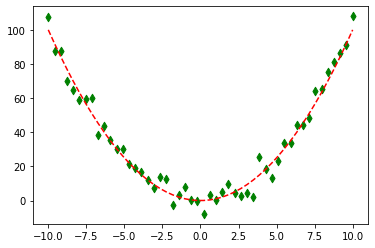

In [13]:
plt.plot(x_range, y_values, 'r--')
plt.scatter(x_range, y_noise, c='green', marker='d');


Although it is possible to change colors manually, Matplotlib automatically assigns colors to lines and point series using an internally defined `style`. The current style can be changed permanently using `plt.style.use(style)` or inside a `with` block using `plt.style.context(style)`. A reference of built-in stylesheets can be found [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). In the following cell is a simple example:


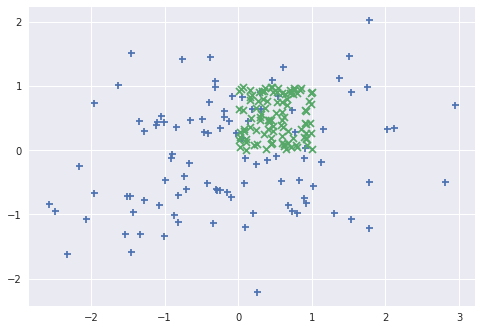

In [14]:
# We create some normal and uniformly distributed noise. (random data i.e. not structured)
xs, ys = np.random.normal(size=(2, 100))
xu, yu = np.random.uniform(size=(2,100))

with plt.style.context('seaborn'):
    plt.scatter(xs, ys, marker='+')
    plt.scatter(xu, yu, marker='x')


### Label, Title and Legends
You can add extra features such as a legend, title, and axis labels to plots easily. An overview and a simple example is provided below. 
 
* `plt.legend(titles)`: Creates a legend using a list of `titles` for the names. Previously plotted elements are added in order.
* `plt.suptitle(title)`: Set plot title using string `title`.
* `plt.ylabel(name)`/`plt.xlabel(name)`: Set plot axis labels.
* `plt.legend(label_list)`: Set the data labels (not axis!) can be done with a label list or without input if labels are provided at each seperate plot. 


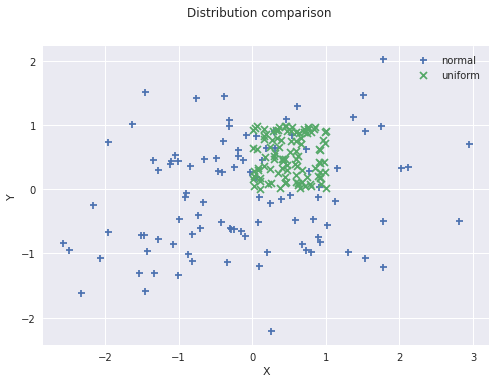

In [15]:
with plt.style.context('seaborn'):
    plt.scatter(xs, ys, marker='+')
    plt.scatter(xu, yu, marker='x')
    plt.legend(['normal', 'uniform'])
    
    plt.suptitle('Distribution comparison')
    plt.ylabel('Y')
    plt.xlabel('X')


## Combining plots
Matplotlib makes it possible to combine multiple plots, a feature you will likely use often. This will introduce some more object-oriented aspects but the API luckely remains largely the same. 

To create a plot with multiple sub-plots, use the function `plt.subplots` (documentation [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)). This is similar to `plt.figure` used in regular Python scripts for creating a new Matplotlib figure. The function returns a *figure* object and an array of *axes* objects. These are then used to fill in each subplot, add titles, and so forth. Examine the code below for a usage sample:

**Notes:**
* subplots get be generated in multiple ways you are welcome to explore other alternatives.


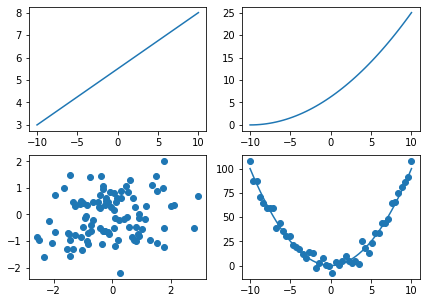

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(7, 5))

ax[0, 0].plot(x_range, y_linear)
ax[0, 1].plot(x_range, y_quadratic)
ax[1, 0].scatter(xs, ys)
ax[1, 1].plot(x_range, y_values)
ax[1, 1].scatter(x_range, y_noise);


## Saving plots
It is possible to save figures directly from a GUI or programatically.

To save a plot, simply call `fig.savefig(output_path)` on a *figure* object. The object can either be obtained from a `plt.subplots` or `plt.figure` call. A simple example is provided below:


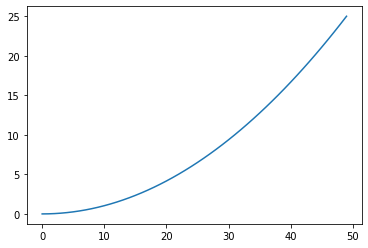

In [17]:
plt.plot(y_quadratic)

plt.gcf().savefig('./Data/outputs.pdf')


That's all for this first little tutorial, hope you find it somewhat helpful. 
